# Data Handling

**Dataset:** Women in Data Science (91,713 encounters)  
**Task:** Understanding Data  
**Date:** February 13, 2025  
**Authors:** Jeremy Balch & Mackenzie Meni

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tableone import TableOne
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")


# Load data and analyze available columns

In [2]:
data = pd.read_csv('../training_v2.csv')

# Display the first few rows of the dataset
data.head()


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [3]:
print(data.columns.tolist())


['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_

# Choose the columns of interest

In [4]:
print(data.columns.tolist())

cols_to_keep = [
 # Patient identifiers
 'patient_id',
 
 # Demographics
 'age','gender','ethnicity', 

 # Clinical Information
 'elective_surgery','bmi', 'apache_4a_hospital_death_prob',

 # Medical History
 'aids','cirrhosis','diabetes_mellitus','hepatic_failure', 
 'immunosuppression','leukemia','lymphoma', 'solid_tumor_with_metastasis',
 
 # Hospital Admission
 'readmission_status','hospital_death'
]


# Keep only the columns we are interested in and reassign it to the data variable
data = data[cols_to_keep]

# Display the first few rows of the dataset
data.head()


['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_

,patient_id,age,gender,ethnicity,elective_surgery,bmi,apache_4a_hospital_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,readmission_status,hospital_death
0,25312,68.0,M,Caucasian,0,22.73,0.10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
1,59342,77.0,F,Caucasian,0,27.42,0.47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,50777,25.0,F,Caucasian,0,31.95,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,46918,81.0,F,Caucasian,1,22.64,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,34377,19.0,M,Caucasian,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [5]:
# Get the unique values in the 'ethnicity' column
ethnicity_values = data['ethnicity'].unique()
print("Unique values in 'ethnicity' column:", ethnicity_values)


Unique values in 'ethnicity' column: ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']


## Converting age and bmi columns into categorical values

Converting age and BMI into categories helps simplify data analysis and improve model interpretability. It reduces noise, making patterns clearer (e.g., "patients aged 50-59 have higher risk" instead of analyzing every individual age). Categorical bins also work better for certain statistical tests and models like decision trees, and they help handle missing values more effectively.

- Binning age into Decades (0-9, 10-19, ..., 80-89)
- Binning BMI into Ranges (10-14, 15-19, ..., >45)

In [6]:
# Function to convert the age and bmi columns to categorical because 
def convert_age_bmi_to_categorical(data):
  
    
    # Create bins and labels for Age
    age_bins = range(0, 91, 10)  # 0-10, 10-20, ... , 90-100
    age_labels = [f"{i}-{i+9}" for i in age_bins[:-1]]  # "0-9", "10-19", ...
    
    # Bin Age
    data['age_cat'] = pd.cut(
        data['age'], 
        bins=age_bins, 
        labels=age_labels, 
        right=False
    )
    
    # Create bins and labels for BMI
    bmi_bins = list(range(10, 46, 5)) + [float('inf')]  # 0-5, 5-10, ... , 40-45, >45
    bmi_labels = [f"{i}-{i+4}" for i in range(10, 45, 5)] + ['>45']  # "0-4", "5-9", ..., "40-44", ">45"
    
    # Bin BMI
    data['bmi_cat'] = pd.cut(
        data['bmi'], 
        bins=bmi_bins, 
        labels=bmi_labels, 
        right=False
    )
    # return the modified data
    return data


In [7]:
# Apply the function to the data to convert age and bmi to categorical and display the first few rows
data = convert_age_bmi_to_categorical(data)

data.head()

,patient_id,age,gender,ethnicity,elective_surgery,bmi,apache_4a_hospital_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,readmission_status,hospital_death,age_cat,bmi_cat
0,25312,68.0,M,Caucasian,0,22.73,0.10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,60-69,20-24
1,59342,77.0,F,Caucasian,0,27.42,0.47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,70-79,25-29
2,50777,25.0,F,Caucasian,0,31.95,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,20-29,30-34
3,46918,81.0,F,Caucasian,1,22.64,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,80-89,20-24
4,34377,19.0,M,Caucasian,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,10-19,NaN


## Converting categorical variables into numerical one-hot encoded columns

Since machine learning models work best with numbers, pd.get_dummies() converts categorical variables into separate 0/1 columns. This avoids misinterpretation of category relationships and ensures models can properly use features like gender, ethnicity, and age groups without assuming a numerical order.

In [8]:
# converts the categorical columns to one-hot encoded variables
data_dummies = pd.get_dummies(data, columns=['gender', 'ethnicity', 'age_cat', 'bmi_cat'])


# Displays the types of the columns in the data_dummies DataFrame
data_dummies.dtypes

# Displays the shape of the data_dummies DataFrame
data_dummies.shape



(91713, 40)

## Handling NaN Values


Many machine learning models, such as linear regression, SVMs, and neural networks, cannot handle missing values, while certain tree-based models, like Random Forest and XGBoost can process them natively. There are many ways of handling missingness and it often depends on the reason why we suspect the variables was missing (missing at random, missing not at random, missing completely at random). While one can impute the missing values using statistical methods (mean, median, regression, or k-nearest neighbors), for simplicity, we will here drop the missing values. 

In [9]:
# Check for NaN values in the data
nan_values = data_dummies.isna().sum()

# Print the number of NaN values in each column
print("NaN values in each column:\n", nan_values)

NaN values in each column:
 patient_id                          0
age                              4228
elective_surgery                    0
bmi                              3429
apache_4a_hospital_death_prob    7947
aids                              715
cirrhosis                         715
diabetes_mellitus                 715
hepatic_failure                   715
immunosuppression                 715
leukemia                          715
lymphoma                          715
solid_tumor_with_metastasis       715
readmission_status                  0
hospital_death                      0
gender_F                            0
gender_M                            0
ethnicity_African American          0
ethnicity_Asian                     0
ethnicity_Caucasian                 0
ethnicity_Hispanic                  0
ethnicity_Native American           0
ethnicity_Other/Unknown             0
age_cat_0-9                         0
age_cat_10-19                       0
age_cat_20-29         

In [10]:
# Drop rows with NaN values
data_dropnan = data_dummies.dropna()

# Print the number of NaN values in each column after dropping rows with NaN values
print(data_dropnan.isnull().sum())

data_dropnan.shape

# Save the preprocessed data to a CSV file
data_dropnan.to_csv('../preprocessed_data.csv', index=False)

patient_id                       0
age                              0
elective_surgery                 0
bmi                              0
apache_4a_hospital_death_prob    0
aids                             0
cirrhosis                        0
diabetes_mellitus                0
hepatic_failure                  0
immunosuppression                0
leukemia                         0
lymphoma                         0
solid_tumor_with_metastasis      0
readmission_status               0
hospital_death                   0
gender_F                         0
gender_M                         0
ethnicity_African American       0
ethnicity_Asian                  0
ethnicity_Caucasian              0
ethnicity_Hispanic               0
ethnicity_Native American        0
ethnicity_Other/Unknown          0
age_cat_0-9                      0
age_cat_10-19                    0
age_cat_20-29                    0
age_cat_30-39                    0
age_cat_40-49                    0
age_cat_50-59       

# What TableOne Does
* Generates a summary table of key statistics (mean, median, standard deviation, counts, etc.).
* Groups data by categorical variables (e.g., case vs. control, male vs. female).
* Displays p-values to compare groups statistically.
* Formats output for research publications.

In [11]:
# Generate Table One
# Example usage of the tableone library to create Table One

from tableone import TableOne

# Define which columns to treat as categorical and which are continuous
categorical_vars = [
    # Age Categories
    'age_cat_0-9', 'age_cat_10-19','age_cat_20-29','age_cat_30-39',
    'age_cat_40-49','age_cat_50-59','age_cat_60-69','age_cat_70-79',
    'age_cat_80-89',

    # BMI Categories
    'bmi_cat_10-14','bmi_cat_15-19','bmi_cat_20-24', 'bmi_cat_25-29',
    'bmi_cat_30-34','bmi_cat_35-39','bmi_cat_40-44',
    'bmi_cat_>45',

    # Demographics
    'gender_F','gender_M', 'ethnicity_African American','ethnicity_Asian','ethnicity_Caucasian',
    'ethnicity_Hispanic','ethnicity_Native American','ethnicity_Other/Unknown',
    
    # Medical History
    'elective_surgery','aids','cirrhosis','diabetes_mellitus', 
    'hepatic_failure','immunosuppression','leukemia','lymphoma', 
    'solid_tumor_with_metastasis','hospital_death'
]

# Define your continuous variables
continuous_vars = [
    'apache_4a_hospital_death_prob'
]

# Optionally, group by hospital_death to see comparisons between groups
group_by = 'hospital_death'

# Build the table
table1 = TableOne(
    data_dropnan, 
    columns=categorical_vars + continuous_vars,  # columns to include in the table
    categorical=categorical_vars,
    groupby=group_by,          # column to group by
    nonnormal=continuous_vars, # treat continuous_vars columns as non-normal for distribution
    pval=True,                 # show p-values
    missing=True               # show counts of missing data
)

# Display the table
print(table1)

# Save the table to a location you're exploring in
# table1.to_csv('/path/to/file/save.csv')

                                                    Grouped by hospital_death                                                     
                                                                      Missing        Overall              0              1 P-Value
n                                                                                      77575          71052           6523        
age_cat_0-9, n (%)                            False                            77575 (100.0)  71052 (100.0)   6523 (100.0)   1.000
age_cat_10-19, n (%)                          False                             76929 (99.2)   70424 (99.1)    6505 (99.7)  <0.001
                                              True                                 646 (0.8)      628 (0.9)       18 (0.3)        
age_cat_20-29, n (%)                          False                             74177 (95.6)   67756 (95.4)    6421 (98.4)  <0.001
                                              True                                3

## Exploring relationships in our data
A correlation matrix helps identify relationships between categorical variables, revealing redundant features, potential biases, and hidden patterns in the data. This is useful for feature selection, fairness analysis, and improving model performance.

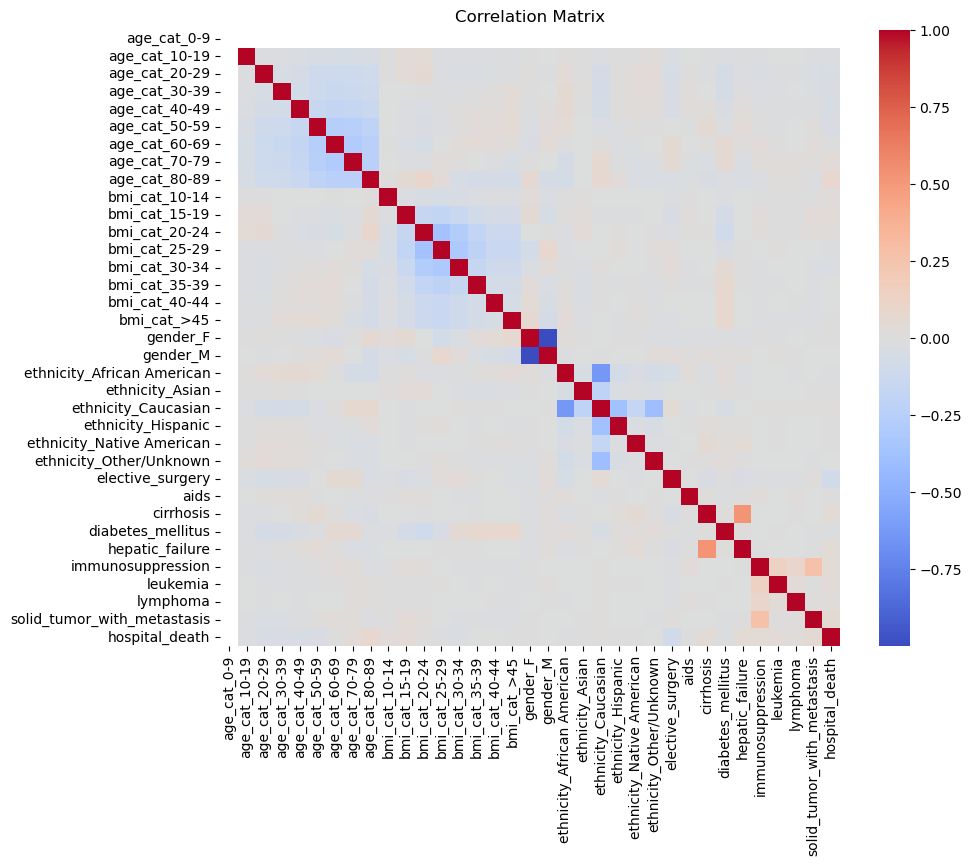

,age_cat_0-9,age_cat_10-19,age_cat_20-29,age_cat_30-39,age_cat_40-49,age_cat_50-59,age_cat_60-69,age_cat_70-79,age_cat_80-89,bmi_cat_10-14,...,elective_surgery,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
age_cat_0-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_cat_10-19,NaN,1.000000,-0.019613,-0.022506,-0.029257,-0.043508,-0.050128,-0.049077,-0.040189,0.002617,...,-0.026710,-0.002754,-0.011684,-0.021684,-0.009379,-0.014372,-0.002822,-0.005935,-0.012476,-0.018565
age_cat_20-29,NaN,-0.019613,1.000000,-0.052566,-0.068334,-0.101618,-0.117081,-0.114627,-0.093867,0.007546,...,-0.053838,0.010350,-0.021768,-0.057493,-0.020397,-0.025110,-0.009395,-0.011908,-0.027940,-0.041700
age_cat_30-39,NaN,-0.022506,-0.052566,1.000000,-0.078412,-0.116605,-0.134349,-0.131533,-0.107711,-0.000556,...,-0.043472,0.018568,-0.002483,-0.056124,0.001713,-0.021618,-0.015754,-0.005550,-0.025633,-0.038318
age_cat_40-49,NaN,-0.029257,-0.068334,-0.078412,1.000000,-0.151583,-0.174650,-0.170989,-0.140022,-0.006697,...,-0.037550,0.017077,0.023122,-0.032049,0.017083,-0.010808,-0.012622,-0.011018,-0.012256,-0.043351
age_cat_50-59,NaN,-0.043508,-0.101618,-0.116605,-0.151583,1.000000,-0.259718,-0.254274,-0.208224,-0.003127,...,-0.000757,0.007893,0.048719,-0.008846,0.036340,0.006071,-0.012372,-0.002373,0.015155,-0.036915
age_cat_60-69,NaN,-0.050128,-0.117081,-0.134349,-0.174650,-0.259718,1.000000,-0.292967,-0.239909,0.001153,...,0.052241,-0.007263,0.014440,0.059386,0.011843,0.026404,0.005890,-0.005518,0.024804,0.001504
age_cat_70-79,NaN,-0.049077,-0.114627,-0.131533,-0.170989,-0.254274,-0.292967,1.000000,-0.234880,-0.005375,...,0.054711,-0.015064,-0.030269,0.054920,-0.024143,0.021072,0.015877,0.018626,0.018237,0.037954
age_cat_80-89,NaN,-0.040189,-0.093867,-0.107711,-0.140022,-0.208224,-0.239909,-0.234880,1.000000,0.008837,...,-0.027398,-0.013180,-0.035249,-0.022867,-0.025386,-0.020811,0.014112,0.008007,-0.020567,0.080285
bmi_cat_10-14,NaN,0.002617,0.007546,-0.000556,-0.006697,-0.003127,0.001153,-0.005375,0.008837,1.000000,...,-0.019247,0.003493,-0.002695,-0.021429,-0.005683,0.001365,0.001714,0.003167,0.002172,0.024523


In [12]:

def correlation_matrix(data):
    corr_cols = categorical_vars
    df_corr = data[corr_cols].corr()

    #Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_corr, annot=False, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

    return df_corr

correlation_matrix(data_dropnan)

## Visualize Mortality per Ethnic Group

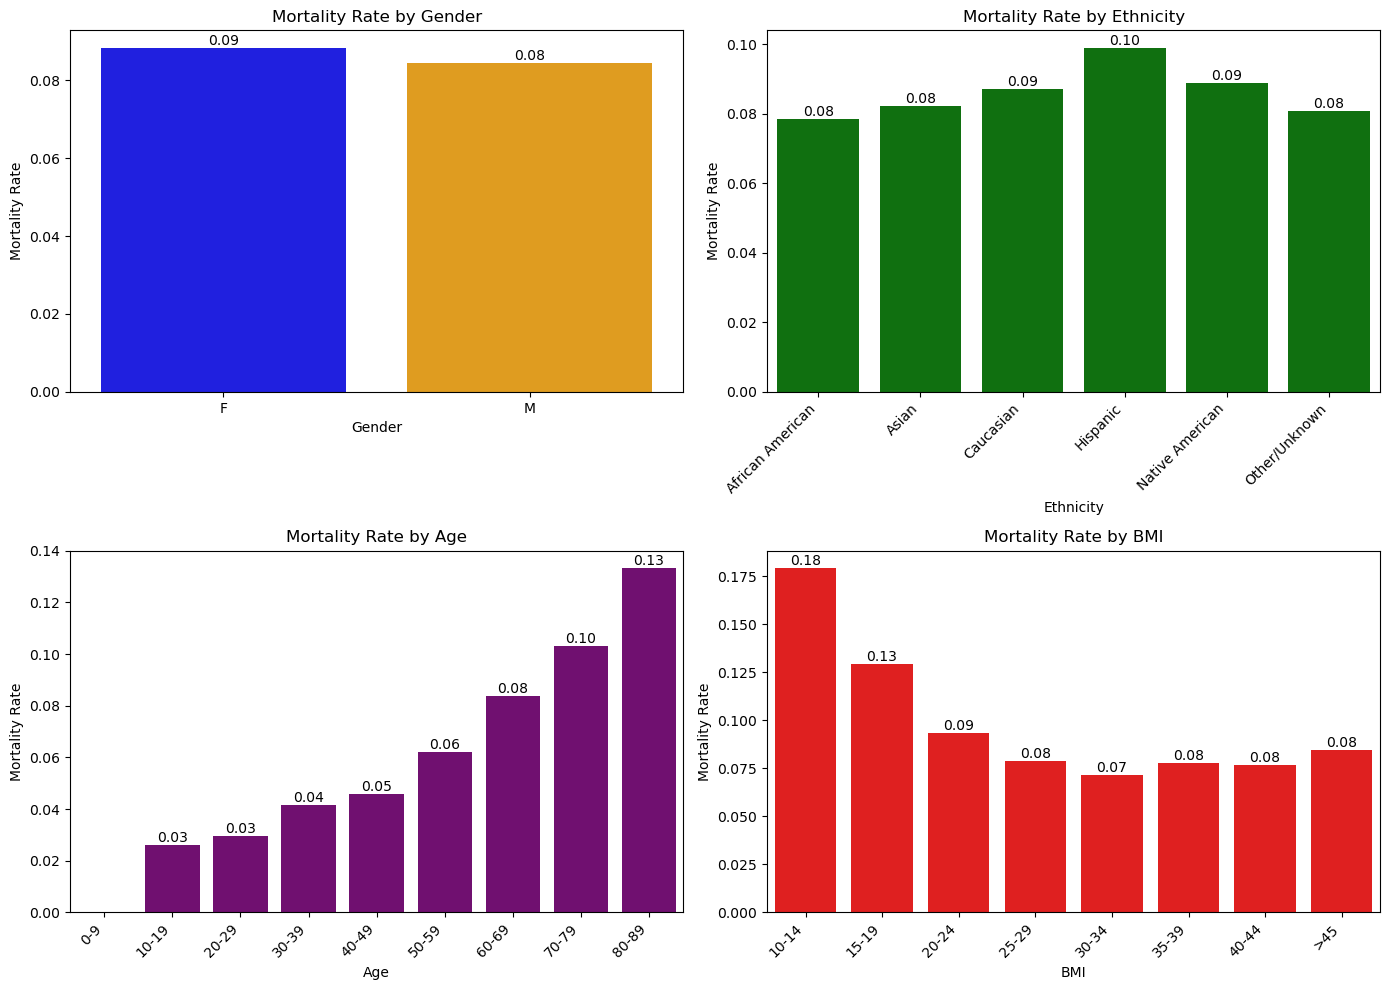

In [13]:

# Calculate mortality rates by gender
gender_mortality = data.groupby('gender')['hospital_death'].mean().reset_index()

# Calculate mortality rates by ethnicity
ethnicity_mortality = data.groupby('ethnicity')['hospital_death'].mean().reset_index()

# Calculate mortality rates by age
age_mortality = data.groupby('age_cat')['hospital_death'].mean().reset_index()

# Calculate mortality rates by bmi
bmi_mortality = data.groupby('bmi_cat')['hospital_death'].mean().reset_index()

# Create a figure with 2 rows and 2 columns
plt.figure(figsize=(14, 10))

# Subplot 1: Mortality by Gender
plt.subplot(2, 2, 1)
sns.barplot(x='gender', y='hospital_death', data=gender_mortality, palette=['blue', 'orange'])
plt.title('Mortality Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=0)
# Add values on top of the bars
for index, value in enumerate(gender_mortality['hospital_death']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Subplot 2: Mortality by Ethnicity
plt.subplot(2, 2, 2)
sns.barplot(x='ethnicity', y='hospital_death', data=ethnicity_mortality, color='green')
plt.title('Mortality Rate by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45, ha='right')
# Add values on top of the bars
for index, value in enumerate(ethnicity_mortality['hospital_death']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Subplot 3: Mortality by Age
plt.subplot(2, 2, 3)
sns.barplot(x='age_cat', y='hospital_death', data=age_mortality, color='purple')
plt.title('Mortality Rate by Age')
plt.xlabel('Age')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45, ha='right')
# Add values on top of the bars
for index, value in enumerate(age_mortality['hospital_death']):
    # Handle NaN categories if present
    if pd.notna(value):
        plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Subplot 4: Mortality by BMI
plt.subplot(2, 2, 4)
sns.barplot(x='bmi_cat', y='hospital_death', data=bmi_mortality, color='red')
plt.title('Mortality Rate by BMI')
plt.xlabel('BMI')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45, ha='right')
# Add values on top of the bars
for index, value in enumerate(bmi_mortality['hospital_death']):
    # Handle NaN categories if present
    if pd.notna(value):
        plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### *DO WE WANT THIS HERE????*


# Change underlying distrbution of patient population


# Introducing Bias into the Dataset for Fairness Analysis

This code intentionally manipulates the dataset to introduce bias in mortality rates and clinical severity scores across demographic groups. The goal is to simulate real-world biases in medical data and observe how they affect model predictions and fairness metrics.


### What This Code Does
  1. Increases Mortality for Specific Groups
     -   African American and Female patients have their hospital_death rate artificially increased.
     -   This simulates historical healthcare disparities where certain groups experience worse health outcomes.


In [40]:

# Make a copy of the dataset before altering
data_altered_complete = data_dropnan.copy()

# # **1️⃣ Increase Mortality for Specific Groups**
# # Example: Increase the mortality rate for 'African American' and 'Female' patients| (data_altered_complete['gender_F'] == 1)
higher_mortality_groups = (data_altered_complete['ethnicity_African American'] == 1)
data_altered_complete.loc[higher_mortality_groups, 'hospital_death'] = np.random.choice(
    [0, 1], 
    size=higher_mortality_groups.sum(), 
    p=[0.6, 0.4]  # Increase death rate to 40% instead of original rate
)

# # **2️⃣ Decrease Mortality for Other Groups**
# # Example: Decrease mortality for 'Caucasian' and 'Male' patients
# lower_mortality_groups = (data_altered_complete['ethnicity_Caucasian'] == 1) & (data_altered_complete['gender_M'] == 1)
# data_altered_complete.loc[lower_mortality_groups, 'hospital_death'] = np.random.choice(
#     [0, 1], 
#     size=lower_mortality_groups.sum(), 
#     p=[0.95, 0.05]  # Drop death rate to only 5%
# )

# # **3️⃣ Skew Apache Scores (Perceived Severity)**
# Reduce severity scores for some high-risk groups to make them "look healthier"
# data_altered_complete.loc[data_altered_complete['gender_F'] == 1, 'apache_4a_hospital_death_prob'] *= 0.7  # Reduce by 30%
# data_altered_complete.loc[data_altered_complete['ethnicity_African American'] == 1, 'apache_4a_hospital_death_prob'] *= 0.6

# data_altered_complete.loc[higher_mortality_groups, 'hospital_death'] = (
#     data_altered_complete.loc[higher_mortality_groups, 'apache_4a_hospital_death_prob'] > np.random.rand(higher_mortality_groups.sum())
# ).astype(int)

# Save the biased dataset for future use
data_altered_complete.to_csv('../data_altered_complete.csv', index=False)

# Make a copy of the dataset before altering
# data_altered_complete = data_dropnan.copy()

# # **1️⃣ Increase Mortality for Specific Groups (Based on Severity)**
# # More likely to die if Apache Score is high, but still inject bias
# higher_mortality_groups = (data_altered_complete['ethnicity_African American'] == 1) | (data_altered_complete['gender_F'] == 1)
# data_altered_complete.loc[higher_mortality_groups, 'hospital_death'] = (
#     data_altered_complete.loc[higher_mortality_groups, 'apache_4a_hospital_death_prob'] > 
#     np.random.uniform(0.3, 0.7, size=higher_mortality_groups.sum())  # Death more likely for these groups
# ).astype(int)

# # **2️⃣ Decrease Severity for Female Patients (Artificially Lower Risk)**
# # The model will think Female patients are healthier than they actually are
# data_altered_complete.loc[data_altered_complete['gender_F'] == 1, 'apache_4a_hospital_death_prob'] *= np.random.uniform(0.4, 0.7)

# # **3️⃣ Decrease Severity for African American Patients (Same Effect)**
# # The model will under-predict risk for this group as well
# data_altered_complete.loc[data_altered_complete['ethnicity_African American'] == 1, 'apache_4a_hospital_death_prob'] *= np.random.uniform(0.3, 0.6)

# # **4️⃣ Keep Other Groups' Mortality More Normal (Prevent Overfitting Bias)**
# # Caucasian/Male patients keep their original probabilities
# caucasian_male_group = (data_altered_complete['ethnicity_Caucasian'] == 1) & (data_altered_complete['gender_F'] == 0)
# data_altered_complete.loc[caucasian_male_group, 'hospital_death'] = (
#     data_altered_complete.loc[caucasian_male_group, 'apache_4a_hospital_death_prob'] > 
#     np.random.uniform(0.7, 0.9, size=caucasian_male_group.sum())  # Death less likely for this group
# ).astype(int)

# # **5️⃣ Save the biased dataset for future use**
# data_altered_complete.to_csv('../data_altered_complete.csv', index=False)



## Visualization of the altered data

### Vizualizing ethnicity

This function visualizes the distribution of ethnicities in a dataset that uses one-hot encoding for ethnicity categories.

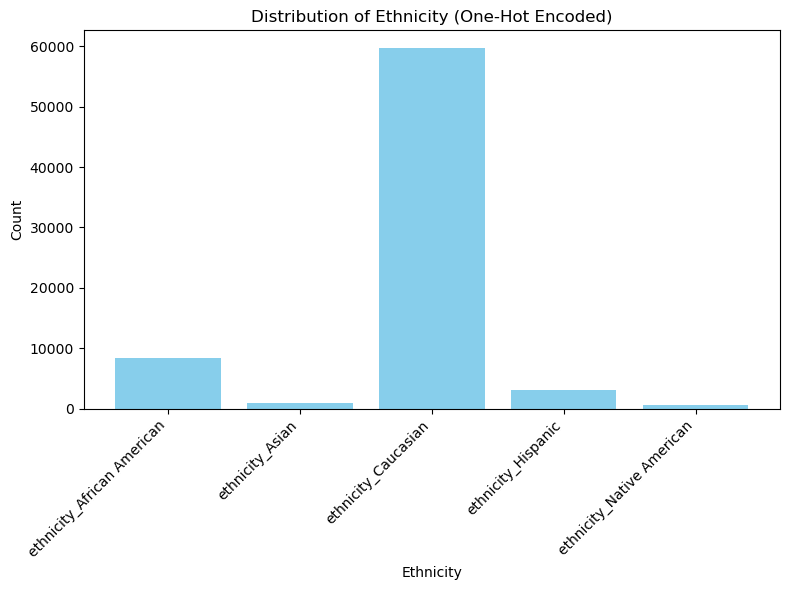

In [38]:
def plot_ethnicity_distribution(data_altered_complete):
    """
    Creates a bar chart (categorical histogram) of the distribution of ethnicities from the one-hot columns.
    """
    

    # Define the ethnicity one-hot columns
    ethnicity_cols = [
        'ethnicity_African American',
        'ethnicity_Asian',
        'ethnicity_Caucasian',
        'ethnicity_Hispanic',
        'ethnicity_Native American'
    ]
    
    # Sum up the occurrences for each ethnicity column
    # (since each row should have exactly one ethnicity set to 1)
    ethnicity_counts = data_altered_complete[ethnicity_cols].sum()
    
    # Create a bar plot of the ethnicity distribution
    plt.figure(figsize=(8, 6))
    plt.bar(ethnicity_counts.index, ethnicity_counts.values, color='skyblue')
    plt.xlabel('Ethnicity')
    plt.ylabel('Count')
    plt.title('Distribution of Ethnicity (One-Hot Encoded)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot the ethinicity distribution for the altered data
plot_ethnicity_distribution(data_altered_complete)

### Vizualizing gender

This function visualizes the distribution of gender in a dataset that uses one-hot encoding for gender categories.

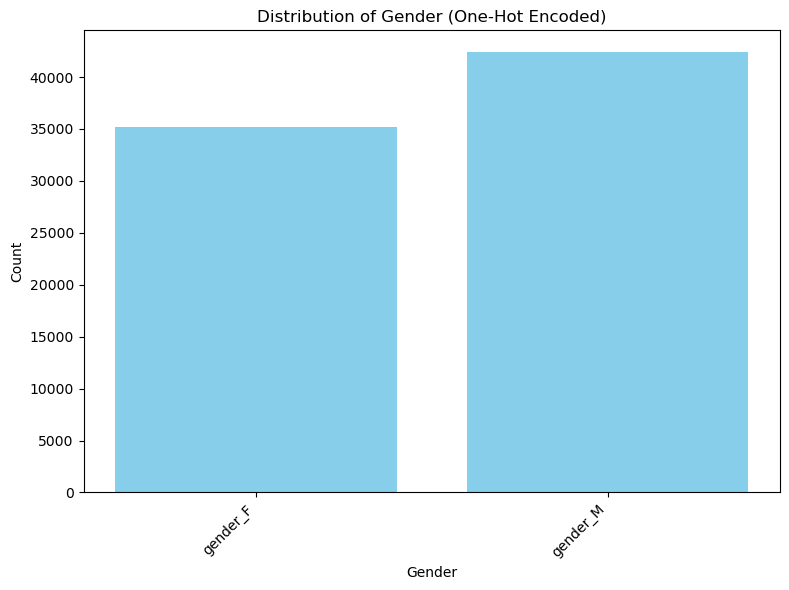

In [39]:
def plot_gender_distribution(data_altered_complete):
    """
    Creates a bar chart (categorical histogram) of the distribution of ethnicities from the one-hot columns.
    """

    # Define the ethnicity one-hot columns
    gender_cols = [
        'gender_F',
        'gender_M'
    ]
    
    # Sum up the occurrences for each ethnicity column
    # (since each row should have exactly one ethnicity set to 1)
    gender_counts = data_altered_complete[gender_cols].sum()
    
    # Create a bar plot of the ethnicity distribution
    plt.figure(figsize=(8, 6))
    plt.bar(gender_counts.index, gender_counts.values, color='skyblue')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.title('Distribution of Gender (One-Hot Encoded)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plotting the gender distribution
plot_gender_distribution(data_altered_complete)

In [65]:
# Generate Table One

# Define which columns to treat as categorical and which are continuous
categorical_vars = [
    # Age Categories
    'age_cat_0-9','age_cat_10-19','age_cat_20-29','age_cat_30-39',
    'age_cat_40-49','age_cat_50-59','age_cat_60-69','age_cat_70-79',
    'age_cat_80-89',

    # BMI Categories
    'bmi_cat_10-14','bmi_cat_15-19','bmi_cat_20-24','bmi_cat_25-29',
    'bmi_cat_30-34','bmi_cat_35-39','bmi_cat_40-44','bmi_cat_>45',

    # Demographics
    'gender_F','gender_M','ethnicity_African American','ethnicity_Asian',
    'ethnicity_Caucasian','ethnicity_Hispanic','ethnicity_Native American',
    
    # Medical History
    'elective_surgery','aids','cirrhosis','diabetes_mellitus', 
    'hepatic_failure','immunosuppression','leukemia','lymphoma',
    'solid_tumor_with_metastasis','hospital_death'
]

# Define your continuous variables
continuous_vars = [
    'apache_4a_hospital_death_prob'
]

# Optionally, group by hospital_death to see comparisons between groups
group_by = 'hospital_death'

# Build the table
table1_altered = TableOne(
    data_altered_complete,                                  # Choose the specific altered table
    columns=categorical_vars + continuous_vars,  # columns to include in the table
    categorical=categorical_vars,
    groupby=group_by,          # column to group by
    nonnormal=continuous_vars, # treat continuous_vars columns as non-normal for distribution
    pval=True,                 # show p-values
    missing=True               # show counts of missing data
)

# Display the table
table1_altered

Grouped by hospital_death                                                     
                                                                      Missing        Overall              0              1 P-Value
n                                                                                      77575          59885          17690        
age_cat_0-9, n (%)                            False                            77575 (100.0)  59885 (100.0)  17690 (100.0)   1.000
age_cat_10-19, n (%)                          False                             76929 (99.2)   59402 (99.2)   17527 (99.1)   0.153
                                              True                                 646 (0.8)      483 (0.8)      163 (0.9)        
age_cat_20-29, n (%)                          False                             74177 (95.6)   57276 (95.6)   16901 (95.5)   0.569
                                              True                                3398 (4.4)     2609 (4.4)      789 (4.5)        
age_cat_30-39, n (%)                          False                             73162 (94.3)   56493 (94.3)   16669 (94.2)   0.601
                                              True                                4413 (5.7)     3392 (5.7)     1021 (5.8)        
age_cat_40-49, n (%)                          False                             70399 (90.7)   54352 (90.8)   16047 (90.7)   0.857
                                              True                                7176 (9.3)     5533 (9.2)     1643 (9.3)        
age_cat_50-59, n (%)                          False                             63305 (81.6)   48835 (81.5)   14470 (81.8)   0.458
                                              True                              14270 (18.4)   11050 (18.5)    3220 (18.2)        
age_cat_60-69, n (%)                          False                             59708 (77.0)   45971 (76.8)   13737 (77.7)   0.014
                                              True                              17867 (23.0)   13914 (23.2)    3953 (22.3)        
age_cat_70-79, n (%)                          False                             60284 (77.7)   46467 (77.6)   13817 (78.1)   0.153
                                              True                              17291 (22.3)   13418 (22.4)    3873 (21.9)        
age_cat_80-89, n (%)                          False                             65061 (83.9)   50399 (84.2)   14662 (82.9)  <0.001
                                              True                              12514 (16.1)    9486 (15.8)    3028 (17.1)        
bmi_cat_10-14, n (%)                          False                             77140 (99.4)   59577 (99.5)   17563 (99.3)   0.002
                                              True                                 435 (0.6)      308 (0.5)      127 (0.7)        
bmi_cat_15-19, n (%)                          False                             71974 (92.8)   55795 (93.2)   16179 (91.5)  <0.001
                                              True                                5601 (7.2)     4090 (6.8)     1511 (8.5)        
bmi_cat_20-24, n (%)                          False                             58658 (75.6)   45328 (75.7)   13330 (75.4)   0.362
                                              True                              18917 (24.4)   14557 (24.3)    4360 (24.6)        
bmi_cat_25-29, n (%)                          False                             54556 (70.3)   41549 (69.4)   13007 (73.5)  <0.001
                                              True                              23019 (29.7)   18336 (30.6)    4683 (26.5)        
bmi_cat_30-34, n (%)                          False                             62783 (80.9)   48331 (80.7)   14452 (81.7)   0.003
                                              True                              14792 (19.1)   11554 (19.3)    3238 (18.3)        
bmi_cat_35-39, n (%)                          False                             70148 (90.4)   54248 (90.6)   15900 (89.9)